In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import tifffile
import seaborn as sns
from sklearn.metrics import confusion_matrix
# from numpy import mean
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.svm import SVC
# from skopt.space import Integer
# from skopt.space import Real
# from skopt.space import Categorical
# from skopt.utils import use_named_args
# from skopt import gp_minimize

## Preprocessing and saving data


In [ ]:
dir = "../data/sentinel_2"

categories = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"]
data = []


for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        satellite_image = tifffile.imread(imgpath)
        satellite_image = np.dstack([satellite_image[:,:,2],satellite_image[:,:,3],satellite_image[:,:,5]])
        try:
            satellite_image = cv2.resize(satellite_image,(50,50))
            image = np.array(satellite_image).flatten()
            data.append([image,label])
        except Exception as e:
            print(Exception)
            pass

print(len(data))

pickle_data = open('../data/Data.pickle','wb')
pickle.dump(data,pickle_data)
pickle_data.close()

27000


## Loading data and training model

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pickle_data = open('../Data.pickle','rb')
data = pickle.load(pickle_data)
pickle_data.close()

random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.2)

## SVM using RBF kernel

In [ ]:
model_rbf = SVC(C=1, kernel='rbf', probability=True)
model_rbf.fit(xtrain,ytrain)
pick = open('../data/models/Model_rbf.sav','wb')
pickle.dump(model_rbf, pick)
pick.close()
print("Done")

Done


In [ ]:
pick = open('../data/models/Model_rbf.sav','rb')
model_rbf = pickle.load(pick)
pick.close()

prediction = model_rbf.predict(xtest)
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       596
           1       0.90      0.94      0.92       606
           2       0.59      0.46      0.52       610
           3       0.50      0.39      0.44       484
           4       0.84      0.90      0.87       506
           5       0.64      0.76      0.69       383
           6       0.56      0.60      0.58       495
           7       0.54      0.73      0.62       629
           8       0.86      0.78      0.82       494
           9       0.98      0.98      0.98       597

    accuracy                           0.72      5400
   macro avg       0.71      0.72      0.71      5400
weighted avg       0.72      0.72      0.71      5400



Text(0.5, 15.0, 'Predicted label')

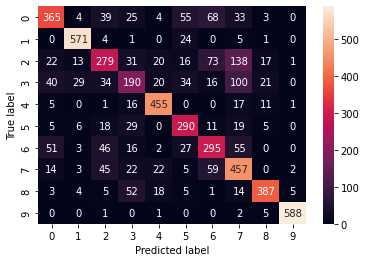

In [ ]:
mat = confusion_matrix(ytest,prediction)
sns.heatmap(mat, annot=True, fmt=".0f")
plt.ylabel('True label')
plt.xlabel('Predicted label')

## SVM using polynomial kernel

In [1]:
model_poly = SVC(C=1, kernel='poly', probability=True)
model_poly.fit(xtrain,ytrain)
pick = open('../data/models/Model_poly.sav','wb')
pickle.dump(model_poly, pick)
pick.close()
print("Done")

Done


In [ ]:
pick = open('../data/models/Model_poly.sav','rb')
model_poly = pickle.load(pick)
pick.close()

prediction = model_poly.predict(xtest)
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.44      0.68      0.54       580
           1       0.86      0.94      0.89       634
           2       0.47      0.67      0.55       605
           3       0.45      0.37      0.41       518
           4       0.85      0.76      0.80       498
           5       0.56      0.56      0.56       387
           6       0.43      0.33      0.37       489
           7       0.60      0.31      0.40       578
           8       0.86      0.73      0.79       522
           9       0.96      0.98      0.97       589

    accuracy                           0.64      5400
   macro avg       0.65      0.63      0.63      5400
weighted avg       0.65      0.64      0.64      5400



Text(0.5, 15.0, 'Predicted label')

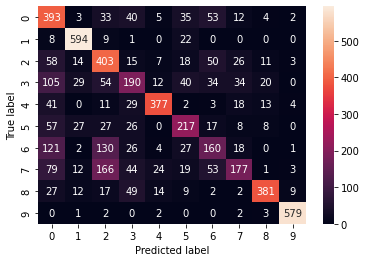

In [ ]:
mat = confusion_matrix(ytest,prediction)
sns.heatmap(mat, annot=True, fmt=".0f")
plt.ylabel('True label')
plt.xlabel('Predicted label')

## SVM using linear kernel

In [ ]:
model_linear = SVC(C=1, kernel='linear', probability=True)
model_linear.fit(xtrain,ytrain)
pick = open('../data/models/Model_linear.sav','wb')
pickle.dump(model_linear, pick)
pick.close()
print("Done")

Done


In [ ]:
pick = open('../data/models/Model_linear.sav','rb')
model_linear = pickle.load(pick)
pick.close()

prediction = model_linear.predict(xtest)
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.34      0.58      0.43       627
           1       0.78      0.93      0.85       619
           2       0.32      0.41      0.36       601
           3       0.30      0.25      0.27       510
           4       0.80      0.64      0.71       484
           5       0.52      0.54      0.53       406
           6       0.28      0.20      0.24       485
           7       0.40      0.17      0.23       597
           8       0.62      0.49      0.55       490
           9       0.96      0.99      0.98       581

    accuracy                           0.53      5400
   macro avg       0.53      0.52      0.52      5400
weighted avg       0.53      0.53      0.52      5400



Text(0.5, 15.0, 'Predicted label')

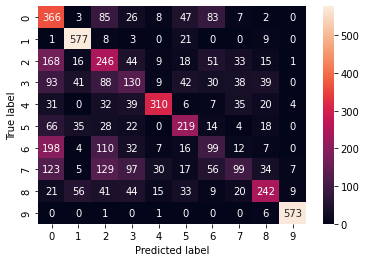

In [ ]:
mat = confusion_matrix(ytest,prediction)
sns.heatmap(mat, annot=True, fmt=".0f")
plt.ylabel('True label')
plt.xlabel('Predicted label')